# Bank_Telephonic_Marketing_Campaigns

### Author : Nusriya.K

### Context of Data
* The data is related to the direct marketing campaigns of a Portuguese banking institution.
* The marketing campaigns were based on phone calls. 
* Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or  ('no') subscribed by the customer.

### Data Import and Pre-processing

In [175]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
sns.set_style('whitegrid')
import matplotlib.pyplot as plt        #For plotting graphs
%matplotlib inline                    
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
import gc
import datetime

In [176]:
# loading the data
bank=pd.read_csv("Bank_Data.csv",sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [177]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [178]:
#To show total rows and columns
bank.shape

(45211, 17)

In [179]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [180]:
# unique count on each column
bank.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [181]:
# check missing values for each column 
bank.isnull().sum().sort_values(ascending=False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64

In [182]:
# dont want to check out the rows with missing values as there in no missing values

In [183]:
# To check any duplicate rows
bank.duplicated().sum()

0

### Basic Statistical Details

In [185]:
#numerical Columns
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [186]:
# String Columns
str_cols= bank.select_dtypes("object").columns
print(str_cols)
bank[str_cols].describe().T

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


In [187]:
bank.rename(columns={'y':'subscribed'},inplace=True)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Text(0.5, 1.0, 'Bank_Balance vs Subscribed')

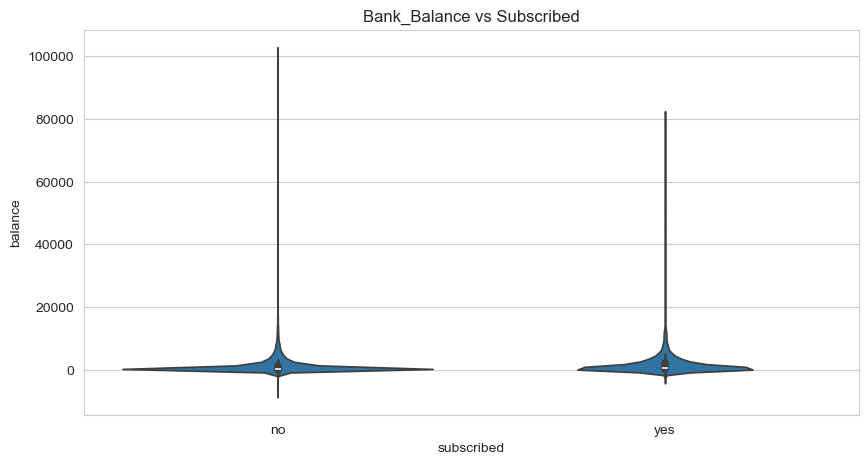

In [188]:
# Let's Visualize how our output variable (deposited) changes with different incomes
plt.figure(figsize=(10,5))
sns.violinplot(data=bank,x='subscribed',y='balance')
plt.title('Bank_Balance vs Subscribed')

In [189]:
# Here we use the apply funtion to transform 'subscribed' from yes or no to 0s and 1s
bank['subscribed']=bank['subscribed'].apply(lambda x: 0 if x == 'no' else 1)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [191]:
# Subscription rate by campaign
subscriptions_rate_by_campaign = bank.groupby(['campaign'])['subscribed'].sum() / bank.groupby('campaign')['subscribed'].count()*100
# Let's see the top ten campaigns in terms of % converted
subscriptions_rate_by_campaign.head(10)

campaign
1     14.597583
2     11.203519
3     11.193624
4      9.000568
5      7.879819
6      7.126259
7      6.394558
8      5.925926
9      6.422018
10     5.263158
Name: subscribed, dtype: float64

Text(0, 0.5, 'Subscription_rate')

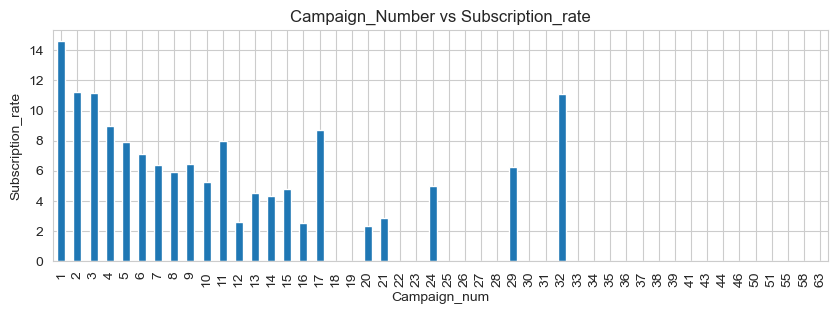

In [192]:
plt.figure(figsize=(10,3))
subscriptions_rate_by_campaign.plot.bar()
plt.title('Campaign_Number vs Subscription_rate')
plt.xlabel('Campaign_num')
plt.ylabel('Subscription_rate')

In [193]:
# Subscription rate by job
subscriptions_rate_by_job= bank.groupby(['job'])['subscribed'].sum() / bank.groupby('job')['subscribed'].count()*100
subscriptions_rate_by_job

job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: subscribed, dtype: float64

Text(0, 0.5, 'Subscription_rate')

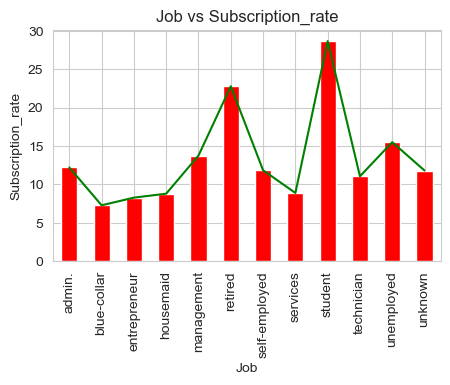

In [194]:
plt.figure(figsize=(5,3))
subscriptions_rate_by_job.plot.bar(color='red')
subscriptions_rate_by_job.plot.line(color='green')
plt.title('Job vs Subscription_rate')
plt.xlabel('Job')
plt.xticks(rotation=90)
plt.ylabel('Subscription_rate')


In [195]:
# Subscription by Marital_status
subscriptions_rate_by_marital_status= bank.groupby(['marital'])['subscribed'].value_counts().reset_index(name='Subscription_count')
subscriptions_rate_by_marital_status

,marital,subscribed,Subscription_count
0,divorced,0,4585
1,divorced,1,622
2,married,0,24459
3,married,1,2755
4,single,0,10878
5,single,1,1912


<Axes: xlabel='marital', ylabel='Subscription_count'>

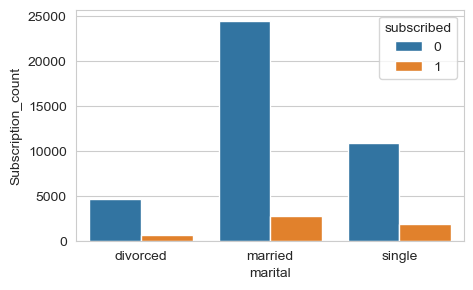

In [196]:
plt.figure(figsize=(5,3))
sns.barplot(data=subscriptions_rate_by_marital_status,x='marital',y='Subscription_count',hue='subscribed')

# Model Development and Evaluation

### Data Preparation

In [199]:
#conversion of Sting to Number
str_cols=bank.select_dtypes('object').columns
bank[str_cols]

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,no,no,no,cellular,nov,success
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown


### Encoding Categorical Variables

In [201]:
# Starting with month first
bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [202]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
bank['month'] = bank['month'].apply(lambda x: months.index(x)+1)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,0


In [203]:
print(bank.housing.unique())
bank.housing=bank.housing.apply(lambda x:0 if x=='no' else 1)
bank.head()

['yes' 'no']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,1,no,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,1,no,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,1,yes,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,1,no,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,0,no,unknown,5,5,198,1,-1,0,unknown,0


In [204]:
bank.loan.unique()

array(['no', 'yes'], dtype=object)

In [205]:
bank.loan=bank.loan.apply(lambda x:0 if x=='no' else 1)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,0,0,unknown,5,5,198,1,-1,0,unknown,0


In [206]:
bank.default.unique()

array(['no', 'yes'], dtype=object)

In [207]:
bank.default=bank.default.apply(lambda x:0 if x=='no' else 1)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0


In [208]:
# label Encoder
from sklearn.preprocessing import LabelEncoder

In [209]:
bank.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [274]:
le_1=LabelEncoder()
bank.job=le_1.fit_transform(bank.job)
for index,value in enumerate(le_1.classes_):
    print(value,':',index)

admin. : 0
blue-collar : 1
entrepreneur : 2
housemaid : 3
management : 4
retired : 5
self-employed : 6
services : 7
student : 8
technician : 9
unemployed : 10
unknown : 11


In [211]:
bank.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [276]:
le_2=LabelEncoder()
bank.marital=le_2.fit_transform(bank.marital)
for index,value in enumerate(le_2.classes_):
    print(value,':',index)

divorced : 0
married : 1
single : 2


In [256]:
bank.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [278]:
le_3=LabelEncoder()
bank.education=le_3.fit_transform(bank.education)
for index,value in enumerate(le_3.classes_):
    print(value,':',index)

primary : 0
secondary : 1
tertiary : 2
unknown : 3


In [280]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,4,1,2,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,9,2,1,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,2,1,1,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,1,1,3,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,11,2,3,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0


In [284]:
le_4=LabelEncoder()
bank.contact=le_4.fit_transform(bank.contact)
for index,value in enumerate(le_4.classes_):
    print(value,':',index)

cellular : 0
telephone : 1
unknown : 2


In [286]:
le_5=LabelEncoder()
bank.poutcome=le_5.fit_transform(bank.poutcome)
for index,value in enumerate(le_5.classes_):
    print(value,':',index)

failure : 0
other : 1
success : 2
unknown : 3


In [288]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,4,1,2,0,2143,1,0,2,5,5,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,5,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,5,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,5,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,5,198,1,-1,0,3,0


### Train-Test_split

In [291]:
# separate independent and dependent var
x = bank.iloc[:,:-1].values
y = bank.iloc[:,-1].values

In [293]:
#import library
from sklearn.model_selection import train_test_split

In [296]:
#split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, test_size=0.4, random_state=40) 

* Training Algorithm

In [301]:
# import libraries
from sklearn.tree import DecisionTreeClassifier

In [305]:
# Decision Tree Classifier
dtree= DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [307]:
#Prediction
y_predict = dtree.predict(x_test)
print(y_predict)

[1 0 0 ... 0 1 0]


In [309]:
#comparing Actual data vs Predicted data
comp_df = pd.DataFrame({"Actual_data":y_test,"Predicted_data":y_predict})
comp_df.head()

,Actual_data,Predicted_data
0,0,1
1,0,0
2,0,0
3,0,1
4,0,1


### Evaluating the Model :

In [314]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[14779  1174]
 [ 1098  1034]]


In [316]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     15953
           1       0.47      0.48      0.48      2132

    accuracy                           0.87     18085
   macro avg       0.70      0.71      0.70     18085
weighted avg       0.88      0.87      0.88     18085



In [318]:
from sklearn.metrics import accuracy_score
print(" Accuracy Score:", accuracy_score(y_test, y_predict))

 Accuracy Score: 0.8743710257119159


In [1]:
# Sample Data to the Classifier